In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import os

In [31]:
# read the data
# data = pd.read_csv('Capgemini_Employee_Reviews_from_AmbitionBox.csv')
data = pd.read_csv('after prep.csv')

# set seed
np.random.seed(0)

In [32]:
# data.head()
# data.tail()
data

,Title,Place,Job_type,Department,Date,Overall_rating,work_life_balance,skill_development,salary_and_benefits,job_security,career_growth,work_satisfaction,Likes,Dislikes
0,Senior Consultant,pune,Full Time,General Insurance Department,8 Sep 2023,4.0,4.0,3.0,3.0,4.0,4.0,4.0,Deserved candidates are promoted promptly.\r\n...,With designation promotions good salary increm...
1,Senior Software Engineer,kolkata,Full Time,Software Development Department,7 Sep 2023,3.0,4.0,4.0,3.0,4.0,4.0,3.0,You got lot of learning platform and monthly l...,You will get fully not tech project.\r\nThere ...
2,Senior Consultant,bangalore,Full Time,Software Development Department,6 Sep 2023,4.0,4.0,5.0,3.0,3.0,4.0,3.0,Based on which Business Unit you are you will ...,Some top level management people bring bad nam...
3,Senior Consultant,pune,Full Time,Banking Operations Department,6 Sep 2023,1.0,2.0,4.0,1.0,4.0,1.0,1.0,Some client projects are good as they use the ...,"Culture, micro management, unprofessional beha..."
4,Team Lead,noida,Full Time,IT Infrastructure Services Department,5 Sep 2023,4.0,5.0,4.0,4.0,4.0,4.0,3.0,"I have worked in IBM (4 years) ,TCS (1 year) ,...",Medical insurance amount is quite low compare ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25891,Project Manager,bangalore,NaN,Technology / IT Department,0 May 2018,2.0,3.0,2.0,1.0,2.0,3.0,2.0,Not sure,I am not seeing any growth prospects. Also ver...
25892,V And V Test Lead,mumbai,NaN,Software Development Department,4 May 2018,5.0,5.0,5.0,4.0,5.0,5.0,5.0,Good care is taken regarding daily employee ne...,It was a great learning experience. Learnt on ...
25893,Manager It Operations,noida,NaN,IT Support Department,0 Mar 2018,4.0,5.0,4.0,4.0,5.0,4.0,5.0,I don't remember any thing which was worth dis...,Good Company to Work With
25894,Consultant,NaN,NaN,Software Development Department,5 Aug 2017,5.0,4.0,4.0,3.0,4.0,5.0,3.0,"In a Closed Room, One is Forced to Submit Resi...",Gvbbbggghggghjjjhhhhhhhhhejejrjeuuhgyhhhhþyjlv...


In [33]:
# number of unique records, total records and column data type
for col in data.columns:
    a = col,len(data[col].unique()),len(data[col])
    b=data[col].dtypes
    print(a,b)

('Title', 4236, 25896) object
('Place', 540, 25896) object
('Job_type', 6, 25896) object
('Department', 620, 25896) object
('Date', 739, 25896) object
('Overall_rating', 5, 25896) float64
('work_life_balance', 6, 25896) float64
('skill_development', 6, 25896) float64
('salary_and_benefits', 6, 25896) float64
('job_security', 6, 25896) float64
('career_growth', 6, 25896) float64
('work_satisfaction', 6, 25896) float64
('Likes', 17497, 25896) object
('Dislikes', 17551, 25896) object


In [34]:
data.describe()

,Overall_rating,work_life_balance,skill_development,salary_and_benefits,job_security,career_growth,work_satisfaction
count,25896.000000,25884.000000,25884.000000,25875.000000,25874.000000,25866.000000,25864.000000
mean,3.707213,3.677330,3.650247,3.049198,3.798214,3.641460,3.177467
std,1.257226,1.282357,1.264726,1.333654,1.261556,1.325345,1.347450
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000
50%,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000
75%,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [35]:
# get the number of missing data points per column
missing_values_count = data.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:14]

Title                      1
Place                   1310
Job_type               14341
Department              3830
Date                       0
Overall_rating             0
work_life_balance         12
skill_development         12
salary_and_benefits       21
job_security              22
career_growth             30
work_satisfaction         32
Likes                   2045
Dislikes                2942
dtype: int64

In [36]:
# how many total missing values do we have?
total_cells = np.product(data.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
round((total_missing/total_cells) * 100,2)

6.78

In [37]:
total_cells

362544

In [38]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (100*data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total_Missing', 'Percent_Missing'])
missing_data.head(20)

,Total_Missing,Percent_Missing
Job_type,14341,55.379209
Department,3830,14.789929
Dislikes,2942,11.360828
Likes,2045,7.896973
Place,1310,5.058696
work_satisfaction,32,0.123571
career_growth,30,0.115848
job_security,22,0.084955
salary_and_benefits,21,0.081094
work_life_balance,12,0.046339


count    25896.000000
mean         3.707213
std          1.257226
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: Overall_rating, dtype: float64


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

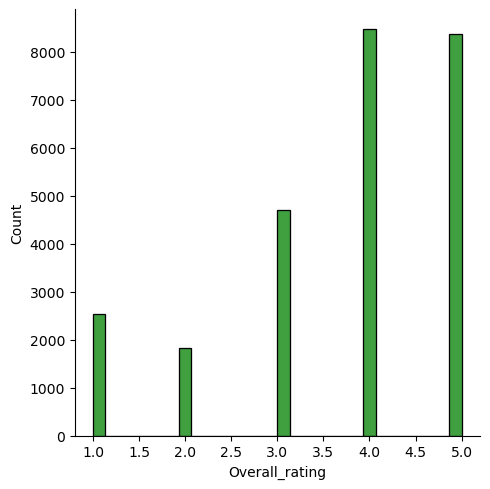

In [39]:
print(data['Overall_rating'].describe())
plt.figure(figsize=(8,6))
sns.displot(data['Overall_rating'],color='green');

count         11555
unique            5
top       Full Time
freq          11339
Name: Job_type, dtype: object


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

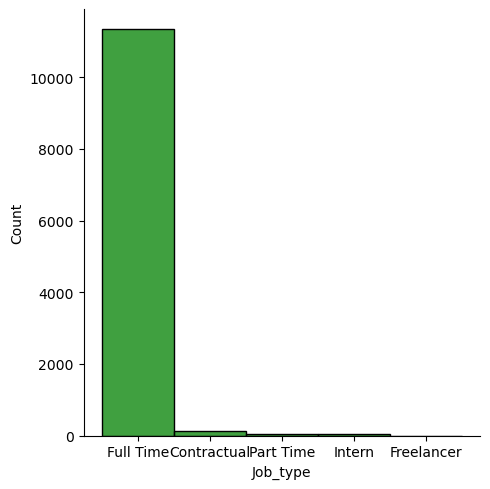

In [40]:
print(data['Job_type'].describe())
plt.figure(figsize=(8,6))
sns.displot(data['Job_type'],color='green');

count                               22066
unique                                619
top       Software Development Department
freq                                 8930
Name: Department, dtype: object


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x800 with 0 Axes>

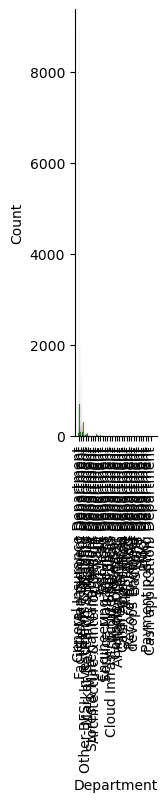

In [41]:
print(data['Department'].describe())
plt.figure(figsize=(6,8))
sns.displot(data['Department'],color='green');

x_labels = data['Department'].unique()[::20]  # 간격 조절
x_ticks = range(0, len(x_labels) * 20, 20)  # 간격에 해당하는 tick 위치 설정
plt.xticks(x_ticks, x_labels, rotation=90)  # 레이블 설정
plt.xlabel("Department")
plt.show()

count         24586
unique          539
top       bangalore
freq           7694
Name: Place, dtype: object


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x800 with 0 Axes>

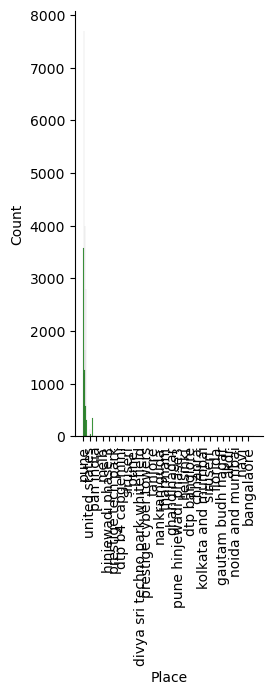

In [42]:
print(data['Place'].describe())
plt.figure(figsize=(6,8))
sns.displot(data['Place'],color='green');

x_labels = data['Place'].unique()[::20]  # 간격 조절
x_ticks = range(0, len(x_labels) * 20, 20)  # 간격에 해당하는 tick 위치 설정
plt.xticks(x_ticks, x_labels, rotation=90)  # 레이블 설정
plt.xlabel("Place")
plt.show()

count                    25895
unique                    4235
top       Associate Consultant
freq                      3013
Name: Title, dtype: object


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x800 with 0 Axes>

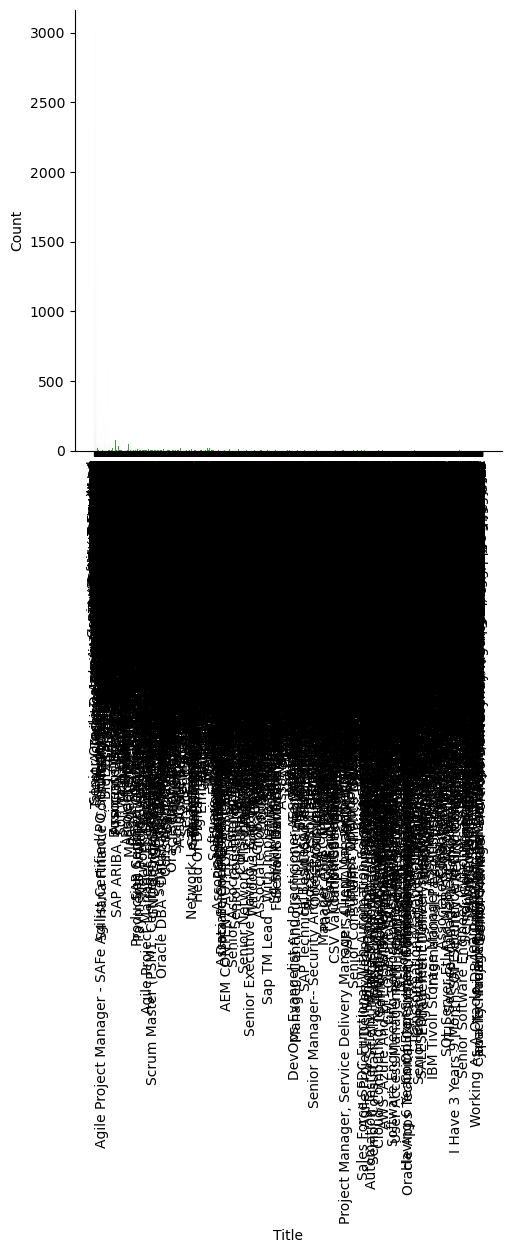

In [43]:
print(data['Title'].describe())
plt.figure(figsize=(6,8))
sns.displot(data['Title'],color='green');

plt.xticks(rotation=90)  # 90도 회전
plt.xlabel("Title")
plt.show()

I think numeric form of Date info will be useful, so I added New Column.

In [53]:
# 'Date' -> 'Date(New)' Format Change
data['Date'] = data['Date'].str.replace('^0', '10', regex=True)

# 'Date(New)' = Year&Month&Day (All Numeric)
data['Date(New)'] = pd.to_datetime(data['Date'], format='%d %b %Y').dt.strftime('%Y%m%d')

# Deleting 'Date' 
# data.drop('Date', axis=1, inplace=True)

# data.to_csv('data_with_date_new2.csv', index=False)
data.to_csv("after prep.csv", index=False)

I think Blank data of 'Job_type' can be 'Full Time'

In [59]:
# Fill the blank with 'Full Time'
data['Job_type'].fillna('Full Time', inplace=True)
data.to_csv("after prep.csv", index=False)

In [55]:
unique_titles = data['Title'].unique()
number_of_unique_titles = len(unique_titles)

print("Number of unique titles:", number_of_unique_titles)
print("List of unique titles:")
for title in unique_titles:
    print(title)

Number of unique titles: 4236
List of unique titles:
Senior Consultant
Senior Software Engineer
Team Lead
Trade Finance Analyst
Senior Developer
Analyst   (working remotely)
Analyst
Senior Consultant C1
Senior Analyst
Cybersecurity Manager
Problem Manager
Associate Consultant
Engineer
Consultant
Associate Consultant SAP Concur
Software Engineer
Network Security Engineer
Trainer
Solution Architect
Manager
Team Manager
Associate Architect
Senior Professional II
Senior Oracle Database Administrator Consultant
Process Associate A3
Technical Writer Cum Technical Illustrator
Technical Manager
Technical Author
Senior Security Analyst
P.A. Accounts Payable Executive
Talent Acquisition Consultant   (working remotely)
Process Associate
Consultant B2
Senior Professional I Engineer
Scrum Master
Sr.Analyst - Software Engineer
Professional 1
Senior Manager
Data Analyst
Physical Verification Engineer
Sap Mm Consultant
Sr Manager
Senior Consultant   (working remotely)
Process Lead And Subject Matter E

In [56]:
unique_titles = data['Department'].unique()
number_of_unique_titles = len(unique_titles)

print("Number of unique Department:", number_of_unique_titles)
print("List of unique Department:")
for title in unique_titles:
    print(title)

Number of unique Department: 620
List of unique Department:
General Insurance Department
Software Development Department
Banking Operations Department
IT Infrastructure Services Department
Other Department
IT Consulting Department
Business Intelligence & Analytics Department
IT Security Department
IT Network Department
Operations Support Department
Data Science & Machine Learning Department
Finance Department
Corporate Training Department
Quality Assurance and Testing Department
Recruitment & Talent Acquisition Department
DBA / Data warehousing Department
SCM & Logistics Department
Other Hospital Staff Department
Aviation Engineering Department
DevOps Department
Facility Management Department
Hardware Department
Engineering & Manufacturing Department
Technology / IT Department
Downstream Department
Operations Department
Accounts payable Department
IT Support Department
Accounting & Taxation Department
Applied Innovation Exchange Department
Back Office Department
Software engineer  Depa